# The Fourier Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Properties

The Fourier transform has a number of specific properties. They can be concluded from its definition. The most important ones in the context of signals and systems are reviewed in the following.

### Invertibility

According to the [Fourier inversion theorem](https://en.wikipedia.org/wiki/Fourier_inversion_theorem), for many types of signals it is possible to recover the signal $x(t)$ from its Fourier transformation $X(j \omega) = \mathcal{F} \{ x(t) \}$

\begin{equation}
x(t) = \mathcal{F}^{-1} \left\{ \mathcal{F} \{ x(t) \} \right\}
\end{equation}

A sufficient condition for the theorem to hold is that both the signal $x(t)$ and its Fourier transformation are absolutely integrable and $x(t)$ is continuous at the considered time $t$. For this type of signals, above relation can be proven by applying the definition of the inverse Fourier transform to the Fourier transform and rearranging terms

\begin{equation}
\begin{split}
x(t) &= \frac{1}{2 \pi} \int_{-\infty}^{\infty} \underbrace{\int_{-\infty}^{\infty} x(\tau) e^{-j \omega \tau} d\tau}_{X(j \omega)} \; e^{j \omega t} d\omega \\
&= \int_{-\infty}^{\infty} x(\tau) \left( \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{-j \omega \tau} e^{j \omega t}  d\omega \right) d\tau \\
&= \int_{-\infty}^{\infty} x(\tau) \delta(t - \tau) d\tau = x(t)
\end{split}
\end{equation}

The solution $\delta(t - \tau)$ of the inverse Fourier transform $\mathcal{F}^{-1} \{ e^{-j \omega \tau} \}$ in the brackets can be deduced from the [Fourier transform of the Dirac impulse](definition.ipynb#Transformation-of-the-Dirac-Impulse). The invertibility of the Fourier transformation holds also for more general signals $x(t)$, composed for instance from Dirac delta distributions.

**Example**

The invertibility of the Fourier transform is illustrated at the example of the [rectangular signal](../continuous_signals/standard_signals.ipynb#Rectangular-Signal) $x(t) = \text{rect}(t)$. The inverse of [its Fourier transform](definition.ipynb#Transformation-of-the-Rectangular-Signal) $X(j \omega) = \text{sinc} \left( \frac{\omega}{2} \right)$ is computed to show that the rectangular signal, although it has discontinuities, can be recovered by inverse Fourier transformation.

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

def fourier_transform(x):
    return sym.transforms._fourier_transform(x, t, w, 1, -1, 'Fourier')

def inverse_fourier_transform(X):
    return sym.transforms._fourier_transform(X, w, t, 1/(2*sym.pi), 1, 'Inverse Fourier')

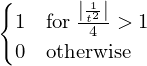

In [2]:
t, w = sym.symbols('t omega')

X = sym.sinc(w/2)
x = inverse_fourier_transform(X)
x

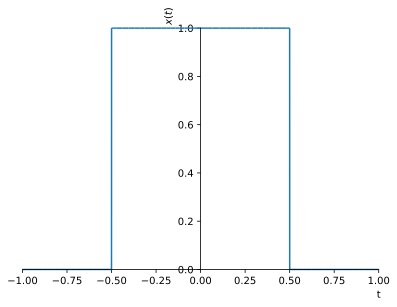

In [3]:
sym.plot(x, (t,-1,1), ylabel=r'$x(t)$');

### Duality

Comparing the [definition of the Fourier transform](definition.ipynb) with its inverse

\begin{align}
X(j \omega) &= \int_{-\infty}^{\infty} x(t) \, e^{-j \omega t} \; dt \\
x(t) &= \frac{1}{2 \pi} \int_{-\infty}^{\infty} X(j \omega) \, e^{j \omega t} \; d\omega
\end{align}

reveals that both are very similar in their structure. They differ only with respect to the normalization factor $2 \pi$ and the sign of the exponential function. The duality principle of the Fourier transform can be deduced from this observation. Let's assume that we know the Fourier transformation $x_2(j \omega)$ of a signal $x_1(t)$ 

\begin{equation}
x_2(j \omega) = \mathcal{F} \{ x_1(t) \}
\end{equation}

It follows that the Fourier transformation of the signal 

\begin{equation}
x_2(j t) = x_2(j \omega) \big\vert_{\omega=t}
\end{equation}

is given as

\begin{equation}
\mathcal{F} \{ x_2(j t) \} = 2 \pi \cdot x_1(- \omega)
\end{equation}

The duality principle of the Fourier transformation allows to carry over results from the time-domain to the spectral-domain and vice-versa. It can be used to derive new transforms from known transforms. This is illustrated at an example. Note, that the Laplace transformation shows no duality. This is due to the mapping of a complex signal $x(t)$ with real valued independent variable $t \in \mathbb{R}$ to its complex transform $X(s) \in \mathbb{C}$ with complex valued independent variable $s \in \mathbb{C}$.

#### Transformation of the exponential signal

The Fourier transform of a shifted Dirac impulse $\delta(t - \tau)$ is derived by introducing it into the definition of the Fourier transform and exploiting the sifting property of the Dirac delta function

\begin{equation}
\mathcal{F} \{ \delta(t - \tau) \} = \int_{-\infty}^{\infty} \delta(t - \tau) \, e^{-j \omega t} \; dt =  e^{-j \omega \tau}
\end{equation}

Using the duality principle, the Fourier transform of $e^{-j \omega_0 t}$ can be derived from this result by 

1. substituting $\omega$ with $t$ and $\tau$ with $\omega_0$ on the right-hand side to yield the time-domain signal $e^{-j \omega_0 t}$
2. substituting $t$ by $- \omega$, $\tau$ with $\omega_0$ and multiplying the result by $2 \pi$ on the left-hand side

\begin{equation}
\mathcal{F} \{ e^{-j \omega_0 t} \} = 2 \pi \cdot \delta(\omega + \omega_0)
\end{equation}

### Linearity

The Fourier transform is a linear operation. For two signals $x_1(t)$ and $x_2(t)$ with Fourier transforms $X_1(j \omega) = \mathcal{F} \{ x_1(t) \}$ and $X_2(j \omega) = \mathcal{F} \{ x_2(t) \}$ the following holds

\begin{equation}
\mathcal{F} \{ A \cdot x_1(t) + B \cdot x_2(t) \} = A \cdot X_1(j \omega) + B \cdot X_2(j \omega)
\end{equation}

with $A, B \in \mathbb{C}$. The Fourier transform of a weighted superposition of signals is equal to the weighted superposition of the individual Fourier transforms. This property is useful to derive the Fourier transform of signals that can be expressed as superposition of other signals for which the Fourier transforms are known or can be calculated easier. Note, linearity holds also for the inverse Fourier transform.

#### Transformation of the cosine and sine signal

The Fourier transform of $\cos(\omega_0 t)$ and $\sin(\omega_0 t)$ is derived by expressing both as harmonic exponential signals using [Euler's formula](https://en.wikipedia.org/wiki/Euler's_formula)

\begin{align}
\cos(\omega_0 t) &= \frac{1}{2} \left( e^{j \omega_0 t} + e^{-j \omega_0 t} \right) \\
\sin(\omega_0 t) &= \frac{1}{2j} \left( e^{j \omega_0 t} - e^{-j \omega_0 t} \right)
\end{align}

together with the Fourier transform $\mathcal{F} \{ e^{-j \omega_0 t} \} = 2 \pi \cdot \delta(\omega - \omega_0)$ from above yields

\begin{align}
\mathcal{F} \{ \cos(\omega_0 t) \} &= \pi \left( \delta(\omega + \omega_0) + \delta(\omega - \omega_0)  \right) \\
\mathcal{F} \{ \sin(\omega_0 t) \} &= j \pi \left( \delta(\omega + \omega_0) - \delta(\omega - \omega_0) \right)
\end{align}

### Symmetries

In order to investigate the symmetries of the Fourier transform $X(j \omega) = \mathcal{F} \{ x(t) \}$ of a signal $x(t)$ with specific properties, first the case of a real valued signal $x(t) \in \mathbb{R}$ is considered. The results are then generalized to complex signals $x(t) \in \mathbb{C}$.

#### Real valued signals

Decomposing a real valued signal $x(t) \in \mathbb{R}$ into its even and odd part $x(t) = x_\text{e}(t) + x_\text{o}(t)$ and introducing these into the definition of the Fourier transform yields

\begin{align}
X(j \omega) &= \int_{-\infty}^{\infty} \left[ x_\text{e}(t) + x_\text{o}(t) \right] e^{-j \omega t} \; dt \\
&= \int_{-\infty}^{\infty} \left[ x_\text{e}(t) + x_\text{o}(t) \right] \cdot \left[ \cos(\omega t) - j \sin(\omega t) \right] \; dt \\
&= \underbrace{\int_{-\infty}^{\infty} x_\text{e}(t) \cos(\omega t) \; dt}_{X_\text{e}(j \omega)} + 
j \underbrace{\int_{-\infty}^{\infty} - x_\text{o}(t) \sin(\omega t) \; dt}_{X_\text{o}(j \omega)}
\end{align}

For the last equality the fact was exploited that an integral with symmetric limits is zero for odd functions. Note that the multiplication of an odd function with an even/odd function results in an even/odd function. In order to conclude on the symmetry of $X(j \omega)$ its behavior for a reverse of the sign of $\omega$ has to be investigated. Due to the symmetry properties of $\cos(\omega t)$ and $\sin(\omega t)$, it follows that the Fourier transform of the

* even part $x_\text{e}(t)$ is real valued with even symmetry $X_\text{e}(j \omega) = X_\text{e}(-j \omega)$
* odd part $x_\text{o}(t)$ is imaginary valued with odd symmetry $X_\text{o}(j \omega) = - X_\text{o}(-j \omega)$

Combining this, it can be concluded that the Fourier transform $X(j \omega)$ of a real-valued signal $x(t) \in \mathbb{R}$ shows complex conjugate symmetry

\begin{equation}
X(j \omega) = X^*(- j \omega)
\end{equation}

It follows that the magnitude spectrum $|X(j \omega)|$ of a real-valued signal shows even symmetry

\begin{equation}
|X(j \omega)| = |X(- j \omega)|
\end{equation}

and the phase $\varphi(j \omega) = \arg \{ X(j \omega) \}$ odd symmetry

\begin{equation}
\varphi(j \omega) = - \varphi(- j \omega)
\end{equation}

Due to these symmetries, both are often plotted only for positive frequencies $\omega \geq 0$. However, without the information that the signal is real-valued it is not possible to conclude on the magnitude spectrum and phase for the negative frequencies $\omega < 0$.

#### Complex Signals

By following the same procedure as above for an imaginary signal, the symmetries of the Fourier transform of the even and odd part of an imaginary signal can be derived. The results can be combined, by decomposing a complex signal $x(t) \in \mathbb{C}$ and its Fourier transform into its even and odd part for both the real and imaginary part. This results in the following symmetry relations of the Fourier transform

![Symmetries of the Fourier transform](symmetries.png)

**Example**

The Fourier transform $X(j \omega)$ of the signal $x(t) = \text{sgn}(t) \cdot \text{rect}(t)$ is computed. The signal is real valued with odd symmetry due to the sign function. It follows from the symmetry relations of the Fourier transform, that $X(j \omega)$ is imaginary with odd symmetry.

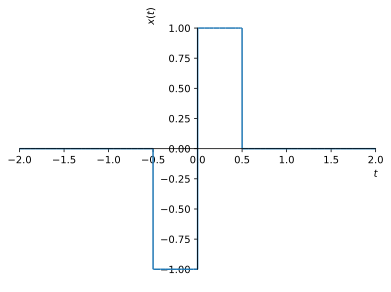

In [4]:
x = - sym.Heaviside(t + 1/2) + 2 * sym.Heaviside(t) - sym.Heaviside(t - 1/2)
sym.plot(x, (t, -2, 2), xlabel=r'$t$', ylabel=r'$x(t)$');

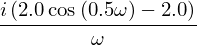

In [5]:
X = fourier_transform(x)
X = X.rewrite(sym.cos).simplify()
X

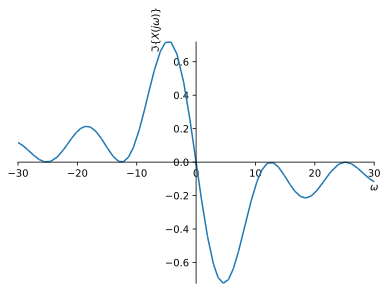

In [6]:
sym.plot(sym.im(X), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$\Im \{ X(j \omega) \}$');

**Exercise**

* What symmetry do you expect for the Fourier transform of the signal $x(t) = j \cdot \text{sgn}(t) \cdot \text{rect}(t)$? Check your results by modifying above example.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.